In [1]:
!pip install pytorch_lightning==0.9.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytorch_lightning-0.9.0-py3-none-any.whl (408 kB)
ERROR: pytorch-lightning-bolts 0.2.5rc1 has requirement pytorch-lightning>=1.0, but you'll have pytorch-lightning 0.9.0 which is incompatible.
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.0.8
    Uninstalling pytorch-lightning-1.0.8:
      Successfully uninstalled pytorch-lightning-1.0.8


In [1]:
from data_loaders.data_module import ChestDataModule
from utils.visualisation import showInRow
from models import get_model

from transforms.pretraining import Moco2TrainTransforms, Moco2ValTransforms
#from transforms.finetuning import ChestTransforms

from models.baseline import BaseLineClassifier

from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint

import torch
import pytorch_lightning as pl
from pytorch_lightning import seed_everything
seed_everything(12345)

12345

Loaded datasets: chest14
Batch 4


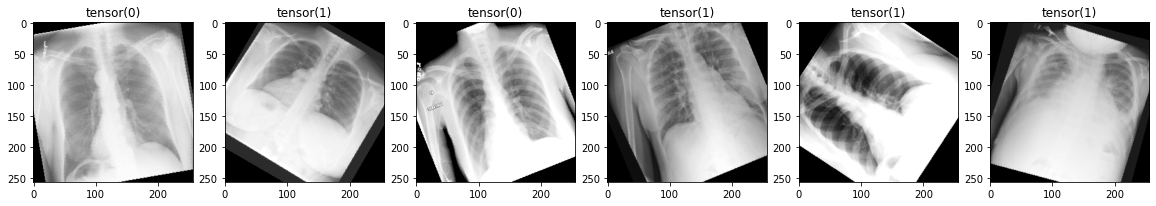

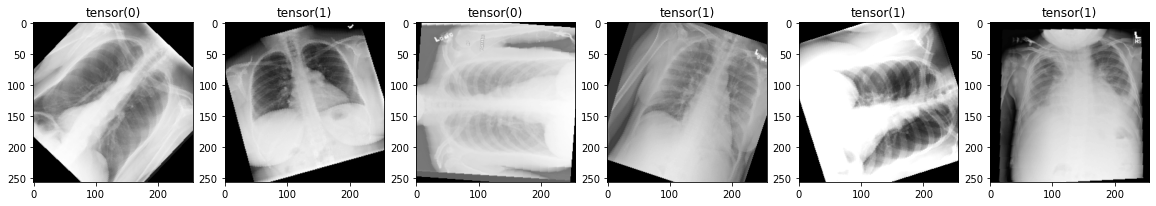

Batch 3


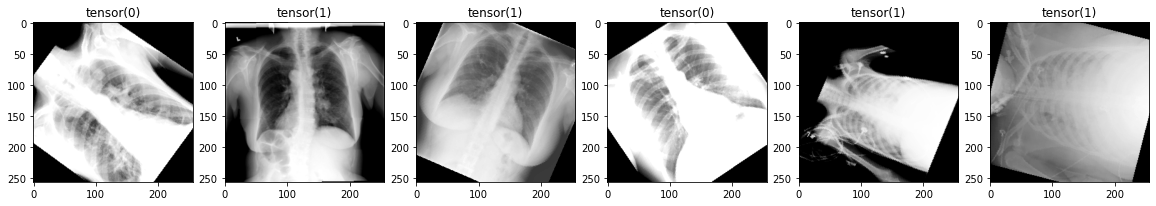

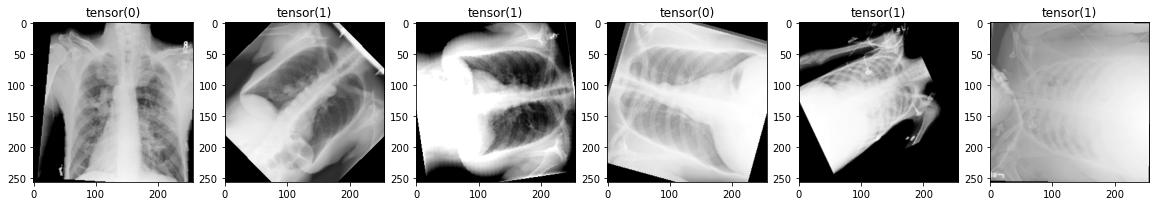

Batch 2


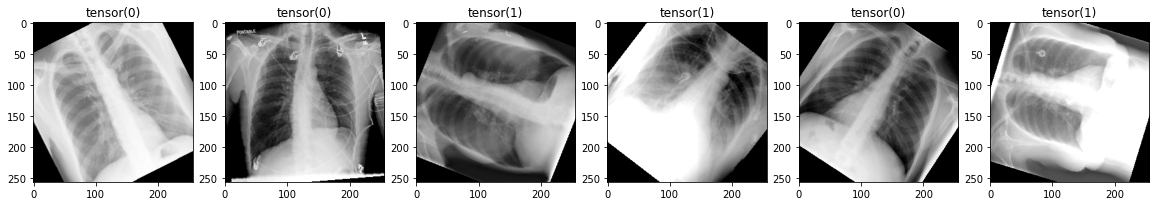

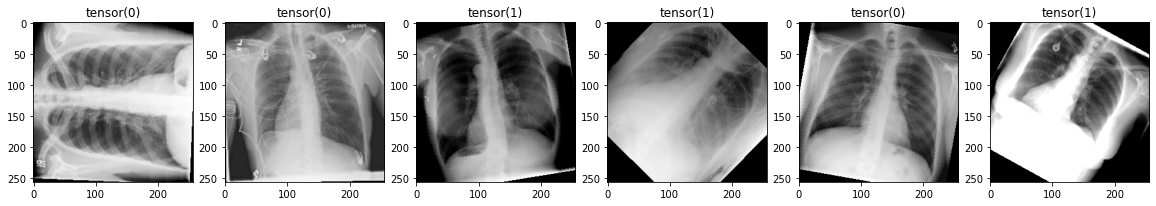

Batch 1


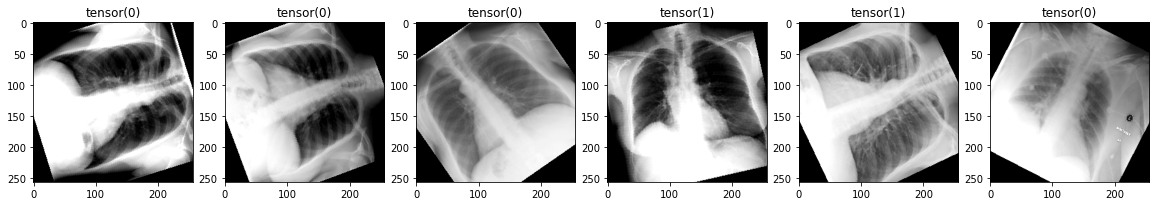

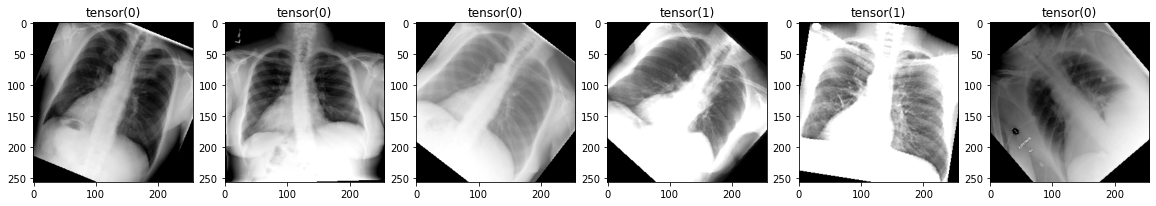

Batch 0


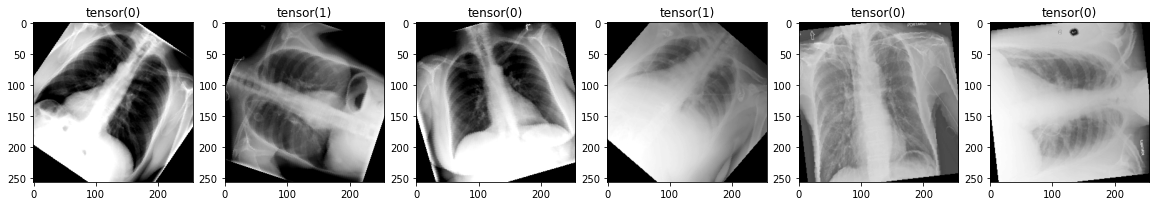

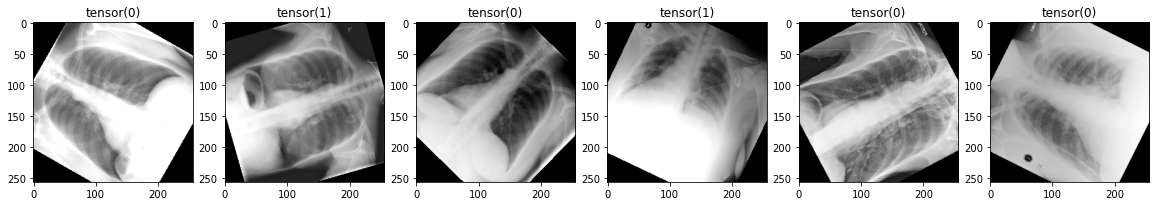

In [11]:
data_module = ChestDataModule(ds_list=["chest14"], batch_size=6, num_workers=2, balanced=True)
data_module.train_transforms = Moco2TrainTransforms(height=256)
data_module.val_transforms = Moco2ValTransforms(height=256)

batches = 4
for batch in data_module.train_dataloader():
    print("Batch",batches)
    img1, labels = batch["image"][0],batch['target']
    showInRow(img1, labels, tensor=True)
    img1, labels = batch["image"][1],batch['target']
    showInRow(img1, labels, tensor=True)
    batches -=  1
    if batches<0:
        break

Loaded datasets: chest14
Before sampling length:  69219
After sampling length:  6921
Batch 4


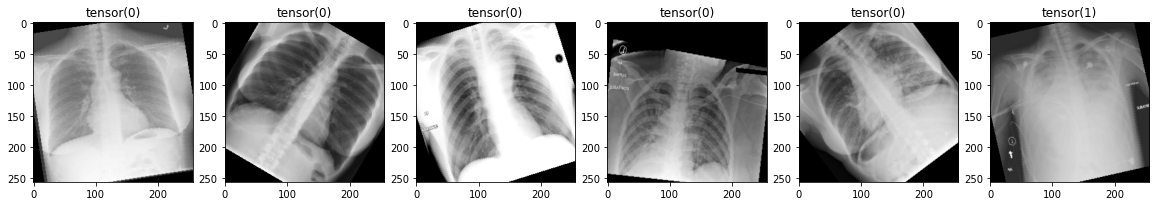

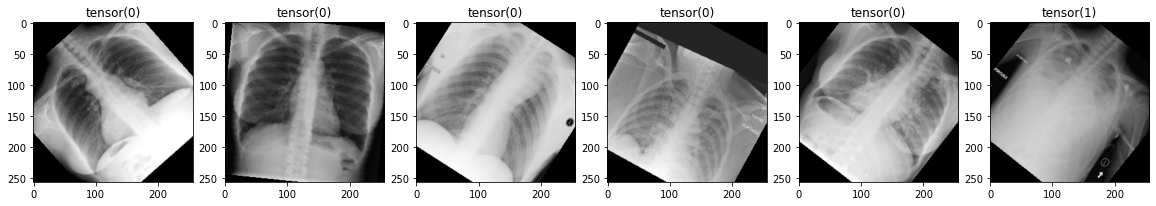

Batch 3


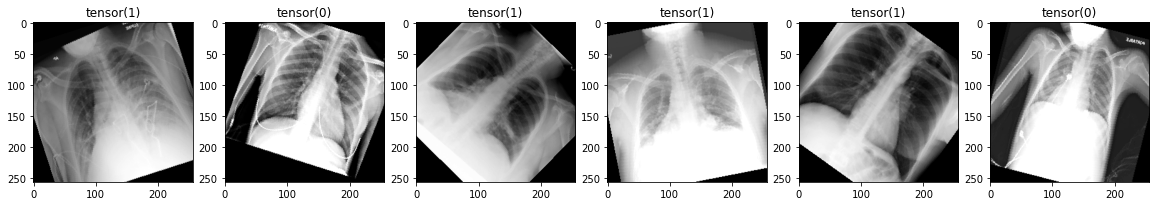

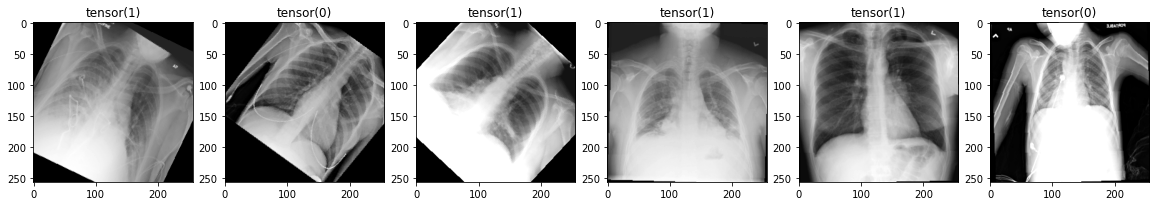

Batch 2


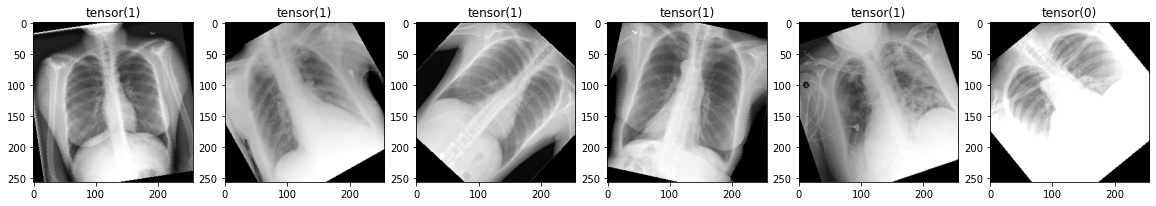

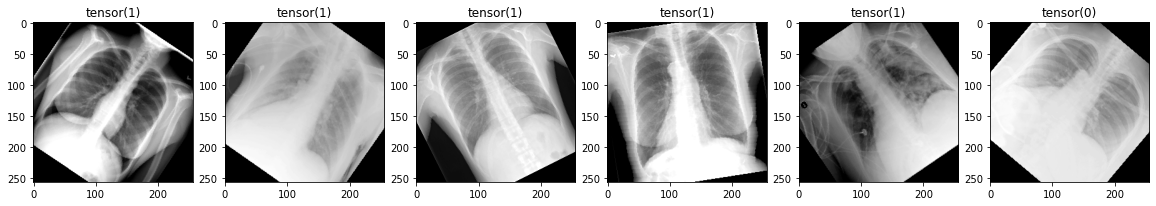

Batch 1


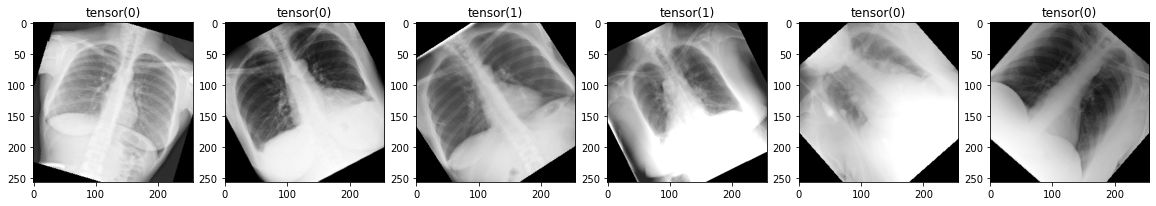

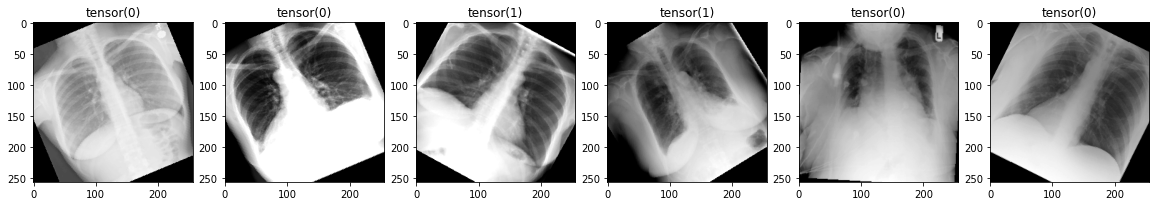

Batch 0


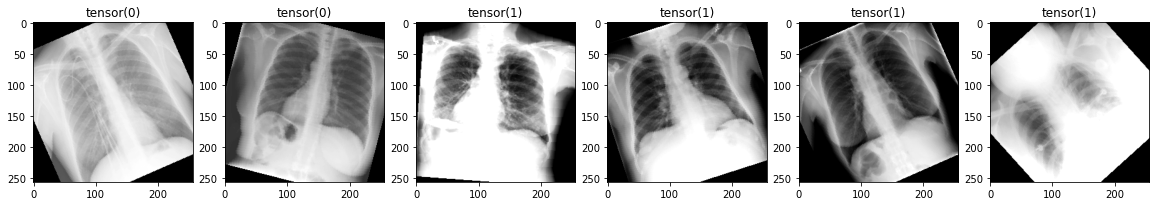

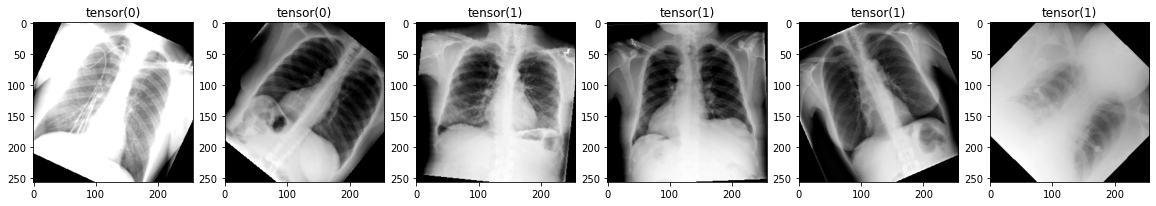

In [8]:
data_module = ChestDataModule(ds_list=["chest14"], batch_size=6, num_workers=2, balanced=True, train_fraction=0.1)
data_module.train_transforms = Moco2TrainTransforms(height=256)
data_module.val_transforms = Moco2ValTransforms(height=256)

batches = 4
for batch in data_module.train_dataloader():
    print("Batch",batches)
    img1, labels = batch["image"][0],batch['target']
    showInRow(img1, labels, tensor=True)
    img1, labels = batch["image"][1],batch['target']
    showInRow(img1, labels, tensor=True)
    batches -=  1
    if batches<0:
        break

In [4]:
trainer.fit(classifier, data_module)

wandb: Currently logged in as: genvekt (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade



  | Name     | Type     | Params
--------------------------------------
0 | model    | ResNet   | 11 M  
1 | accuracy | Accuracy | 0     
/home/intern/.local/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


ModuleAttributeError: 'BaseLineClassifierAdam' object has no attribute 'log'